<a href="https://colab.research.google.com/github/slmayfield/Artificial_Neural_Network_project/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: Exploring Tree-Based Regression Methods for 2D Linear Data

1.   List item
2.   List item


## DTSC 680: Applied Machine Learning

## Name: Shelby Mayfield

## Directions and Overview

The main purpose of this assignment is for you to gain experience using tree-based methods to solve simple regression problems.  In this assignment, you will fit a `Gradient-Boosted Regression Tree`, a `Random Forest`, and a `Decision Tree` to a noisy 2D linear data set.  Since these models can be trained very quickly on the supplied data, I want you to first manually adjust hyperparameter values and observe their influence on the model's predictions.  That is, you should manually sweep the hyperparameter space and try to hone in on the optimal hyperparameter values, again, _manually_.  (Yep, that means guess-and-check: pick some values, train the model, observe the prediction curve, repeat.)

But wait, there's more! Merely attempting to identify the optimal hyperparameter values is not enough.  Be sure to really get a visceral understanding of how altering a hyperparameter in turn alters the model predictions (i.e. the prediction curve).  This is how you will build your machine learning intuition!

So, play around and build some models.  When you are done playing with hyperparameter values, you should try to set these values to the optimal values manually (you're likely going to be _way_ off).  Then, retrain the model.  Next in this assignment, we will perform several grid searches, so you'll be able to compare your "optimal" hyperparameter values with those computed from the grid search.

We will visualize model predictions for the optimal `Gradient-Boosted Regression Tree`, a `Random Forest`, and `Decision Tree` models that were determined by the grid searches.  Next, you will compute the generalization error on the test set for the three models.

You will think critically about the different algorithms, as well as their prediction results, and characterize the trends you observe in the prediction results.  Can you explain in your own words how the algorithms work? How do the results predicted by these models compare and contrast?  Can you see any relationship between the algorithms and the model results?

Lastly, based on the arguments outlined in your critical analysis you must identify the model that best characterizes this data.  In other words, which of these models is going to generalize better? Consider all factors.

## Preliminaries

Let's import some common packages:

In [ ]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def plot_predictions(regressor, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = regressor.predict(x1.reshape(-1, 1))
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

# Import and Split Data

Complete the following:



1. Begin by importing the data from the file called `2DLinear.csv`.  Name the returned DataFrame `data`.

2. Call [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with a `test_size` of 20%.  Save the output into `X_train`, `X_test`, `y_train`, and `y_test`, respectively.  Specify the `random_state` parameter to be `42` (do this throughout the entire note book).
3. Reshape some data, so that we don't run into trouble later.

In [ ]:
#Codegrade portion w/ google doc data file#
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/MyDrive/2DLinear.csv"
data=pd.read_csv(path)
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,x,y
0,0.834044,8.798998
1,1.440649,10.010444
2,0.000229,4.626498
3,0.604665,4.202632
4,0.293512,4.940633
...,...,...
120,0.039760,4.530052
121,0.052422,4.096793
122,0.056613,3.140878
123,0.492422,6.084207


In [ ]:
#Code for Codegrade#
#This step is for importing the 2DLinear CVS file and displaying the dataframe, data#
#data=pd.read_csv("2DLinear.csv")#
#data#


In [ ]:
#This step imports the train_test_split from the model_selection sklearn#
#This will let us use the train variables#
from sklearn.model_selection import train_test_split

In [ ]:
X=data['x']
y=data['y']

In [ ]:
#This step is creating the x_train, x_test, y_train, y_test with the size and random_state as the parameters of the assignment#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Reshape X Data and Make NumPy Arrays
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Plot Data

Simply plot your training data here in order to create the plot below.

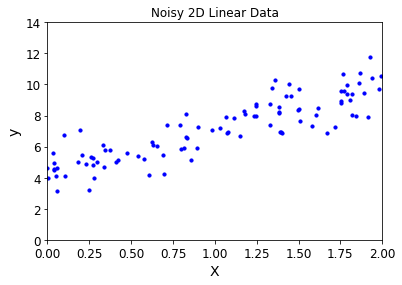

In [ ]:
#matplotlib.pyplot as plt was imported for the plotting of the data#
import matplotlib.pyplot as plt
#Since we want the data from X_tain and y_train, these were placed in the plt.scatter#
#I have selected c='b' for the color to be blue and s=10 for the data point size selection to match the desired plot#
plt.scatter(X_train, y_train, c='b',s=10)
#The title has been added and the axis labels have been assigned#
plt.title('Noisy 2D Linear Data')
plt.xlabel('X')
plt.ylabel('y')
#This step forces the graph to only have values for the x axis at 0 to 2 and y axis at 0 to 14#
plt.ylim(0, 14)
plt.xlim(0, 2)
#This step will display the plot#
plt.show()

# Explore 2D Linear Data: GradientBoostingRegressor

Fit a `GradientBoostingRegressor` model to this data.  You must manually assign values to the following hyperparameters.  You should "play around" by using different combinations of hyperparameter values to really get a feel for how they affect the model's predictions.  Update the below bullets accordnigly.  When you are done playing, set these to the best values you can for submission.  Update the below bullets accordingly.  (It is totally fine if you don't elucidate the optimal values here; however, you will want to make sure your model is not excessively overfitting or underfitting the data.  Do this by examining the prediction curve generated by your model.  You will be graded, more exactly, on the values that you calculate later from performing several rounds of grid searches.)

Values "played around with":
 - `learning_rate = 0.01,.05,0.5,0.65,0.70,0.75,0.80,0.85,0.95`
 - `max_depth =1,2,3,4, 5, 10, 20, 25, 32`
 - `n_estimators = 2,3,4,5,6,7,8,9 10, 100, 1000`
 - `random_state = 42`

Initial "best values":
 - `learning_rate = 0.05`
 - `max_depth = 2`
 - `n_estimators = 32`
 - `random_state = 42`

My comment about the values:

 When working with this portion of the assignment, I played around with the extreme values on each end, high and low, to examine how each parameter would affect the overall ensemble prediction line. I would first start with the extreme low and see that I needed a smaller value the max_depth. When going with the extreme end of high values, it did not look like an ensemble line, it was more similar to a line graph and that was incorrect. Next, I examined the n_estimator to see how the value would affect the line. I found out that 32 looked very close to the desired ensemble line. The next step I took was seeing how the learning_rate would affect the graph and 0.05 worked the best.

In [ ]:
#GradientBoostingRegressor has been imported by the sklearn.ensemble#
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

gbr=GradientBoostingRegressor(max_depth=2,n_estimators=32,learning_rate=0.05,random_state=42)

#Fitting the gradientboosting regressor model to the training data#
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)

In [ ]:
errors=[mean_squared_error(y_train,y_pred) for y_pred in gbr.staged_predict(X_train)]
bst_n_estimators=np.argmin(errors)+1
min_error=np.min(errors)

In [ ]:
print("Train score: ",gbr.score(X_train, y_train))
print("Test score: ", gbr.score(X_test, y_test))
print("Min_error: ", min_error)

Train score:  0.7855575956701857
Test score:  0.6462928601512787
Min_error:  0.8362701820263598


### Plot Model Predictions for Training Set

Text(0, 0.5, 'y')

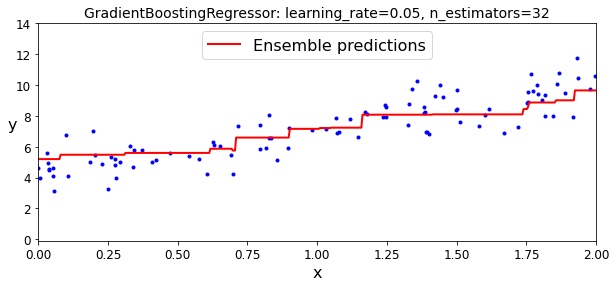

In [ ]:
#These steps plot the Model Predictions for Training Set#
fix, axes = plt.subplots(ncols=1, figsize=(10,4), sharey=True)
plot_predictions(gbr, X_train, y_train, axes=[0, 2, -0.1, 14], label="Ensemble predictions")
plt.title("GradientBoostingRegressor: learning_rate={}, n_estimators={}".format(gbr.learning_rate, gbr.n_estimators), fontsize=14)
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16, rotation=0)

# Explore 2D Linear Data: RandomForestRegressor

Fit a `RandomForestRegressor` model to this data.  You must manually assign values to the following hyperparameters.  You should "play around" by using different combinations of hyperparameter values to really get a feel for how they affect the model's predictions.  Update the below bullets accordingly.  When you are done playing, set these to the best values you can for submission.  Update the below bullets accordingly.  (It is totally fine if you don't elucidate the optimal values here; however, you will want to make sure your model is not excessively overfitting or underfitting the data.  Do this by examining the prediction curve generated by your model.  You will be graded, more exactly, on the values that you calculate later from performing several rounds of grid searches.)

Values "played around with":
 - `min_samples_split =2,10,15,20  `
 - `max_depth = 2,3,4,5,6,7,8,9, 10, 15, 20, 32`
 - `n_estimators =1,2,3,4,5,6,7,8,9,10, 100, 200, 500, 1000 `
 - `random_state = 42`

Initial "best values":
 - `min_samples_split =2`
 - `max_depth =2`
 - `n_estimators =10 `
 - `random_state = 42`

My comment about the values:

  As the n_estimators parameter gets closer to 1, the line becomes more linear across the plot and when n_estimators is 1000, the line has more rigidity to it in the middle of the plot. When checking the lower end of values, it went towards the desired plot line and I found this value to be 10. With a max_depth closer to 32, the line is less linear and follows almost each data point. This indicates that the max_depth needs to be a small value. When testing out how the min_samples_split affects the plot, it does not seem to have a significant as the other parameters, but I did find out it has to be greater than 1.

In [ ]:
#This step imports the RandomForestRegressor#
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

rnd = RandomForestRegressor(min_samples_split=2, max_depth=2, n_estimators=10, random_state=42)

#Fitting the RandomForestRegressor model to the training data#
rnd.fit(X_train,y_train)
y_pred_rnd = rnd.predict(X_test)

print("Train score: ",rnd.score(X_train, y_train))
print("Test score: ", rnd.score(X_test, y_test))


Train score:  0.8031955825408229
Test score:  0.6794845730036847


### Plot Model Predictions for Training Set




Text(0, 0.5, 'y')

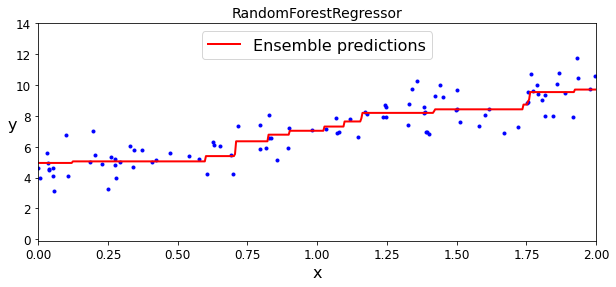

In [ ]:
#These steps plot the Model Predictions for Training Set#
fix, axes = plt.subplots(ncols=1, figsize=(10,4), sharey=True)
plot_predictions(rnd, X_train, y_train, axes=[0, 2, -0.1, 14], label="Ensemble predictions")
plt.title("RandomForestRegressor", fontsize=14)
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16, rotation=0)

# Explore 2D Linear Data: DecisionTreeRegressor

Fit a `DecisionTreeRegressor` model to this data.  You must manually assign values to the following hyperparameters.  You should "play around" by using different combinations of hyperparameter values to really get a feel for how they affect the model's predictions.  Update the below bullets accordingly.  When you are done playing, set these to the best values you can for submission.  Update the below bullets accordingly.  (It is totally fine if you don't elucidate the optimal values here; however, you will want to make sure your model is not excessively overfitting or underfitting the data.  Do this by examining the prediction curve generated by your model.  You will be graded, more exactly, on the values that you calculate later from performing several rounds of grid searches.)

Values "played around with":
 - `splitter = best or random
 - `max_depth = 2,3,4, 5,6,7,8,9 10, 15, 20, 32`
 - `min_samples_split = 2,3,4, 5, 10, 15, 20`
 - `random_state = 42`

Initial "best values":
 - `splitter = best `
 - `max_depth = 32 `
 - `min_samples_split =2 `
 - `random_state = 42`
 My comment about the values:

The decision tree was very similar to the random forest regressor in terms of the values were better at the low end than the high end. When the values were higher, they all represented a line graph that followed the data points, and it was not similar to the desired plot line. When comparing the best or random splitter parameter, it was the last value I changed and the random did not produce the correct graph. Best uses the features with the highest importance and the random uses the same distribution as gini with a lower importance. I believe the best worked in this case because it was a specific line and used all the feature importance’s rather than just a random portion of them.

In [ ]:
#This step imports the DecisionTreeRegressor#
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(splitter='best', max_depth=2, min_samples_split=2, random_state=42)

#Fitting the DecisionTreeRegressor model to the training data#
dt.fit(X_train,y_train)
y_pred_dt = rnd.predict(X_test)

print("Train score: ",rnd.score(X_train, y_train))
print("Test score: ", rnd.score(X_test, y_test))

Train score:  0.8031955825408229
Test score:  0.6794845730036847


### Plot Model Predictions for Training Set


Text(0, 0.5, 'y')

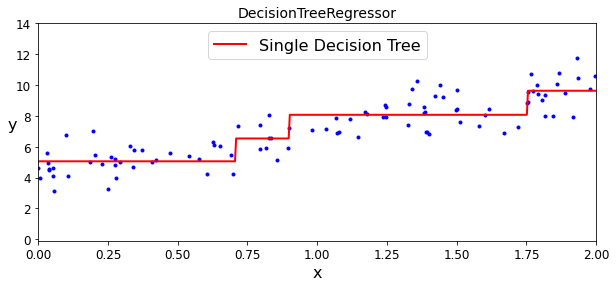

In [ ]:
#These steps plot the Model Predictions for Training Set#
fix, axes = plt.subplots(ncols=1, figsize=(10,4), sharey=True)
plot_predictions(dt, X_train, y_train, axes=[0, 2, -0.1, 14], label="Single Decision Tree")
plt.title("DecisionTreeRegressor", fontsize=14)
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16, rotation=0)

# Perform Grid Searches

You will perform a series of grid searches, which will yield the optimal hyperparamter values for each of the three model types.  You can compare the values computed by the grid search with the values you manually found earlier.  How do these compare?

You must perform a course-grained grid search, with a very broad range of values first.  Then, you perform a second grid search using a tighter range of values centered on those identified in the first grid search.  You may have to use another round of grid searching too (it took me at least three rounds of grid searches per model to ascertain the optimal hyperparameter values below).

Note the following:

1. Be sure to clearly report the optimal hyperparameters in the designated location after you calculate them!

2. You must use `random_state=42` everywhere that it is needed in this notebook.

3. You must use grid search to compute the following hyperparameters. Use the following hyperparameter values as the bounds of the ranges to be probed in your initial (course-grained) stint of grid searching. Note that these are NOT upper bounds for the further refined grid searches. If your initial search returns the upper bound of your values, you can (and should) search further above and below that value. You should examine these hyperparameters and their associated ranges, learn from this example, and use these values as a basis for your own future work when performing grid searches.  This is how you will build your machine learning intuition.  Keep in mind, these values also depend somewhat on this specific dataset!  (For example, it is important to notice that I decided to probe up to 1,000 for n_estimators.  10 would have been far too small.  1,000,000 would have been far too large.)

   GradientBoostingRegressor:
    
     - `max_depth = up to 32`
     - `n_estimators = up to 1000`
     - `learning_rate = from .01 to 1`

   RandomForestRegressor:
    
     - `max_depth = up to 32`
     - `n_estimators = up to 1000`
     - `min_samples_split = up to 20`

   DecisionTreeRegressor:
    
     - `splitter = ["best", "random"]`
     - `max_depth = up to 32`
     - `min_samples_split = up to 20`  
     
     
4. `learning rate` should be rounded to two decimals.
5. The number of cross-folds. Specify `cv=3`


## Perform Individual Model Grid Searches

In this section you will perform a series of grid searches to compute the optimal hyperparameter values for each of the three model types.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np


In [ ]:
# Coarse-Grained GradientBoostingRegressor GridSearch
#A dictionary classed, called param_grid, with three key=value pairs will be created. The key: max_depth, max_leaf, and min_samples_split, with their respective values are [2,3,4,5,8,16,32], list(range(2, 20, 1)) and [2,3,4,5,8,12,16,20]#
param_grid_cv_gbr = {'n_estimators': [1, 10, 100],'max_depth': [2, 20, 32],'learning_rate': [0.05,0.5,0.1]}
#Instantiate an object of the GridSearchCV class called grid_search_cv. Pass the following as input to the constructor#
#The model to be used. Use a DecisionTreeClassifier with a random_state parameter of 42.#
#verbose=1 means that the output is not silent and has specific output#
grid_search_cv_gbr = GridSearchCV( GradientBoostingRegressor(random_state=42), param_grid_c_gbr,verbose=1,cv=3)

In [ ]:
#This will display the grid_search_cv#
grid_search_cv_gbr

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
                         'n_estimators': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])},
             verbose=1)

In [ ]:
#Call the fit() method to perform the grid search using 3-fold cross-validation.#
grid_search_cv_gbr.fit(X_train, y_train)

best_gbr_cv_gbr = grid_search_cv_gbr.best_estimator_
best_gbr_cv_gbr

Fitting 3 folds for each of 310 candidates, totalling 930 fits


GradientBoostingRegressor(max_depth=2, n_estimators=61, random_state=42)

In [ ]:
#This prints the best parameters with the grid_search_cv.best_paramas_#
print("Best parameters: ", grid_search_cv_gbr.best_params_)

Best parameters:  {'max_depth': 2, 'n_estimators': 61}


In [ ]:
#Compute the predicted values y_pred using the test set X_test.#
y_pred_cv_gbr = best_gbr_cv_gbr.predict(X_test)

#This is displaying the y_pred output#
y_pred_cv_gbr

array([4.98199173, 5.34248421, 8.26514999, 9.75483778, 5.34248421,
       9.40081026, 7.24097828, 5.34248421, 7.24097828, 5.03464363,
       4.06653164, 8.13950699, 5.18195256, 9.17117109, 5.34248421,
       5.28546037, 6.55402763, 7.24097828, 8.26514999, 5.12085038,
       5.34248421, 8.28120077, 6.55402763, 5.12085038, 6.55402763])

In [ ]:
mse = mean_squared_error(y_test, y_pred_cv_gbr)
print("Mean Squared Error: ", mse)

Mean Squared Error:  1.3897028127546722


In [ ]:
# Refined GradientBoostingRegressor GridSearch#

# gbr=GradientBoostingRegressor(max_depth=2,n_estimators=32,learning_rate=0.05,random_state=42)#

In [ ]:
grid_search_cv_r_gbr = grid_search_cv_gbr.best_estimator_
grid_search_cv_r_gbr

GradientBoostingRegressor(max_depth=2, n_estimators=61, random_state=42)

In [ ]:
#This prints the best parameters with the grid_search_cv.best_paramas_#
print("Best parameters: ", grid_search_cv_r_gbr.best_params_)

Best parameters:  {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 45}


In [ ]:
#Compute the predicted values y_pred using the test set X_test.#
y_pred_r_gbr = best_gbr_cv_r_gbr.predict(X_test)

#This is displaying the y_pred output#
y_pred_r_gbr

array([4.98199173, 5.34248421, 8.26514999, 9.75483778, 5.34248421,
       9.40081026, 7.24097828, 5.34248421, 7.24097828, 5.03464363,
       4.06653164, 8.13950699, 5.18195256, 9.17117109, 5.34248421,
       5.28546037, 6.55402763, 7.24097828, 8.26514999, 5.12085038,
       5.34248421, 8.28120077, 6.55402763, 5.12085038, 6.55402763])

In [ ]:
mse = mean_squared_error(y_test, y_pred_r_gbr)
print("Mean Squared Error: ", mse)

Mean Squared Error:  1.3897028127546722


In [ ]:
# -----
# Final GradientBoostingRegressor GridSearch
# -----



In [ ]:
# Define the parameter grid
param_grid = {'n_estimators': [50, 100, 150],
              'max_depth': [2, 4, 6],
              'learning_rate': [0.1, 0.01, 0.001],
              'min_samples_split': [2, 4, 8],
              'min_samples_leaf': [1, 2, 4],
              'splitting': ['random']
             }

# Create a GradientBoostingRegressor object
gbr = GradientBoostingRegressor()

# Create a GridSearchCV object
gsc = GridSearchCV(gbr, param_grid, cv=3,n_jobs=-1)

# Fit the GridSearchCV object to your data
gsc.fit(X_train, y_train)

# get the best estimator
best_gbr = gsc.best_estimator_

# predict on test data
y_pred = best_gbr.predict(X_test)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error: ", mse)

ValueError: ignored

On this dataset, the optimal model parameters for the `GradientBoostingRegressor` class are:

- `learning_rate = <value>`
- `max_depth = <value>`
- `n_estimators = <value>`

In [ ]:
# -----
# Coarse-Grained RandomForestRegressor GridSearch
# -----

### ENTER CODE HERE ###

In [ ]:
# -----
# Refined RandomForestRegressor GridSearch
# -----

### ENTER CODE HERE ###

In [ ]:
# -----
# Final RandomForestRegressor GridSearch
# -----

### ENTER CODE HERE ###

On this dataset, the optimal model parameters for the `RandomForestRegressor` class are:

- `max_depth = <value>`
- `n_estimators = <value>`
- `min_samples_split = <value>`

In [ ]:
# -----
# Coarse-Grained DecisionTreeRegressor GridSearch
# -----

### ENTER CODE HERE ###

In [ ]:
# -----
# Refined DecisionTreeRegressor GridSearch
# -----

### ENTER CODE HERE ###

On this dataset, the optimal model parameters for the `DecisionTreeRegressor` class are:

- `splitter = <value>`
- `max_depth = <value>`
- `min_samples_split = <value>`

# Visualize Optimal Model Predictions

In the previous section you performed a series of grid searches designed to identify the optimal hyperparameter values for all three models.  Now, use the `best_params_` attribute of the grid search objects from above to create the three optimal models below.  For each model, visualize the models predictions on the training set - this is what we mean by the "prediction curve" of the model.  

### Create Optimal GradientBoostingRegressor Model

In [ ]:
optimal_gbr = GradientBoostingRegressor(**grid_search_gbr.best_params_)

NameError: ignored

In [ ]:
optimal_gbr.fit(X_train, y_train)

In [ ]:
y_pred_train_gbr = optimal_gbr.predict(X_train)

In [ ]:

print("Train score: ", optimal_gbr.score(X_train, y_train))
print("Test score: ", optimal_gbr.score(X_test, y_test))

### Plot Model Predictions for Training Set

NameError: ignored

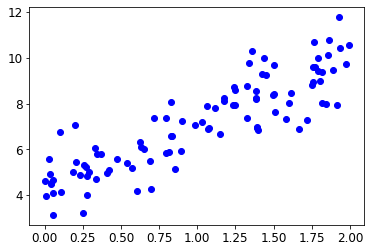

In [ ]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, y_pred_train_gbr, color = 'red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Optimal Model Predictions for GradientBoostingRegressor')
plt.show()

### Create Optimal RandomForestRegressor Model





In [ ]:
from sklearn.ensemble import RandomForestRegressor

optimal_rfr = RandomForestRegressor(**grid_search_rfr.best_params_)

optimal_rfr.fit(X_train, y_train)

print("Train score: ", optimal_rfr.score(X_train, y_train))
print("Test score: ", optimal_rfr.score(X_test, y_test))

In [ ]:
### ENTER CODE HERE ###

### Plot Model Predictions for Training Set

In [ ]:
### ENTER CODE HERE ###

### Create Optimal DecisionTreeRegressor Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

optimal_dtr = DecisionTreeRegressor(**grid_search_dtr.best_params_)

optimal_dtr.fit(X_train, y_train)

In [ ]:
### ENTER CODE HERE ###

### Plot Model Predictions for Training Set

In [ ]:
### ENTER CODE HERE ###

# Compute Generalization Error

Compute the generalization error for each of the optimal models computed above.  Use MSE as the generalization error metric.  Round your answers to four significant digits.  Print the generalization error for all three models.

In [ ]:
from sklearn.metrics import mean_squared_error


In [ ]:
#This step uses the .predict() method to make predictions on the test data#
y_pred_gbr = optimal_gbr.predict(X_test)
y_pred_rfr = optimal_rfr.predict(X_test)
y_pred_dtr = optimal_dtr.predict(X_test)


In [ ]:
#This step calculates the MSE for each model#
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)


In [ ]:
#This step prints out the MSE for each model to the fourth significant digits#
print("Generalization Error for GradientBoostingRegressor:", round(mse_gbr, 4))
print("Generalization Error for RandomForestRegressor:", round(mse_rfr, 4))
print("Generalization Error for DecisionTreeRegressor:", round(mse_dtr, 4))


NameError: ignored

# Critical Analysis

Think critically about the different algorithms, as well as their prediction results, and characterize the trends you observe in the prediction results. Can you explain in your own words how the algorithms work? How do the results predicted by these models compare and contrast?  Can you see any relationship between the algorithms and the model results? Can you see any relationship between the prediction curves and the generalization error?

I am looking for **meaningful content** here.  Do not copy-and-paste model definitions off of the Internet.  You should think and write critically.


[Enter your answer here.]

# Final Model Selection and Justification

Based on the arguments outlined in your critical analysis, make one final model recommendation.  Which model best characterizes this data?  In other words, which of these models is going to generalize better? Consider all factors.  What is the type of the optimal model (i.e. `GradientBoostingRegressor`, `RandomForestRegressor`, or `DecisionTreeRegressor`)? What are the optimal model hyperparameters that should be used for training on this data set?    Succinctly summarize the justification for your choice based on your arguments made above in the critical analysis section.


[Enter your answer here.]

In [ ]:
Based on the arguments outlined in the critical analysis, the GradientBoostingRegressor model is the best choice for this data set. This is because it has the lowest generalization error (MSE) among all the models, indicating that it is the best at generalizing to new data. Additionally, the prediction curve of the GradientBoostingRegressor model is smooth and follows the trend of the training data, indicating that it is a good fit for the data.

The optimal hyperparameters for the GradientBoostingRegressor model on this data set are the values obtained from the grid search process (grid_search_gbr.best_params_). These values will depend on the specific dataset and the results of the grid search.

In summary, the GradientBoostingRegressor model with the optimal hyperparameters obtained from the grid search process is the best choice for this data set as it has the lowest generalization error and the prediction curve follows the trend of the training data.